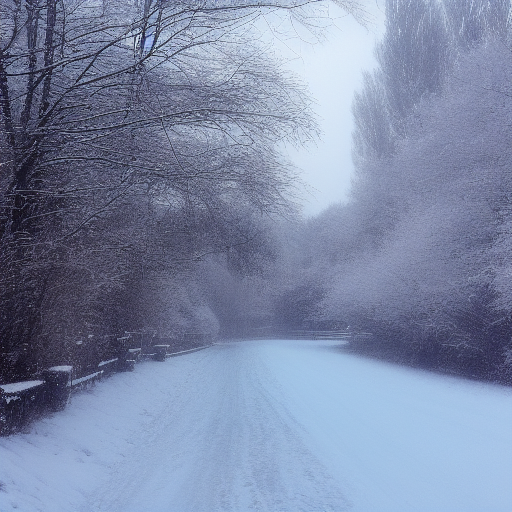

In [118]:
import json
import requests
import io
import base64
from PIL import Image

url = 'http://0.0.0.0:8000/txt2img_api/'

data = {'prompt': 'winter', 
        'negative_prompt': '',
        'seed': 44,
        'height': 512,
        'width': 512}

res = requests.post(url, json=data)
res_js = res.json()

# # data_js = json.dumps(data)
# # res = requests.post(url, data=data_js)
# # res_js = json.loads(res.text)

def bytes2img(bytes):
    image_bytes = base64.b64decode(bytes)
    img = io.BytesIO(image_bytes)

    return Image.open(img)

bytes2img(res_js['image_bytes'][0])

In [52]:
del(res_js['uuid'])

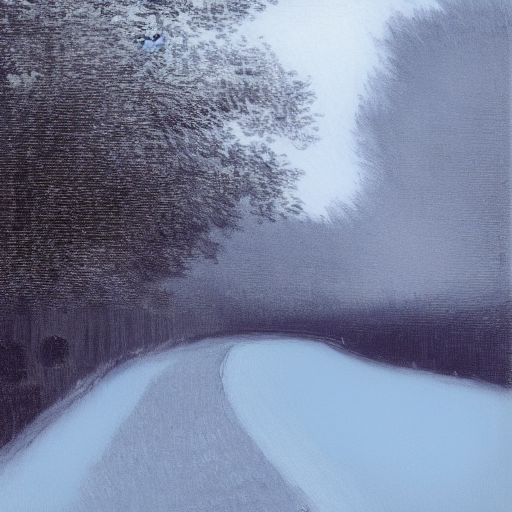

In [125]:
import json
import requests
from PIL import Image

with open('/data/kimgh/ImEzy/stable-diffusion-flask/outputs/txt2img-json/221027_1727_testname_1f4ece8e-bd95-4b21-86c2-fa9604c4bea1.json', 'r') as f:
    image = json.load(f)


url = 'http://0.0.0.0:8000/img2img_api/'

data = {'prompt': '{painted by van gogh}', 
        'negative_prompt': '',
        'init_img': image['image_bytes'][0],
        'seed': 44,
        'height': 512,
        'width': 512,
        'denoising_strength': 0.4}

res = requests.post(url, json=data)
res_js = res.json()

def bytes2img(bytes):
    image_bytes = base64.b64decode(bytes)
    img = io.BytesIO(image_bytes)

    return Image.open(img)

bytes2img(res_js['image_bytes'][0])

In [ ]:
import os

uuid = '8a8622eb-73c0-4aed-8313-f6b4d918747a'
path = '/data/kimgh/ImEzy/stable-diffusion-flask/outputs/txt2img-json/'
txt2img_ls = os.listdir(path)

txt2img_js = [js for js in txt2img_ls if uuid in js][0]

with open(path+txt2img_js, 'r') as f:
    js = json.load(f)

js

In [116]:
from datetime import datetime

dt_now = datetime.utcnow()
# dt_utc = datetime.now() + datetime.timedelta(hours=9)
dt_str = dt_now.strftime('%y%m%d_%H%M')

str(dt_now)[:-7]

'2022-10-31 06:47:34'

In [117]:
datetime.strptime(str(dt_now)[:-7], '%Y-%m-%d %H:%M:%S')

datetime.datetime(2022, 10, 31, 6, 47, 34)